In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df = pd.merge(trial_data, mouse_data,  how="left", on=['Mouse ID', 'Mouse ID'])
df = df.dropna()

# Display the data table for preview
df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
grouped_drug_time_mean = df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_by_drug_and_time = pd.DataFrame({ "Mean Tumor Volume (mm3)" : grouped_drug_time_mean}).reset_index()

# # # Preview DataFrame
mean_tumor_by_drug_and_time.head(100)

,Drug,Timepoint,Mean Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#std_err = lambda x: np.std(x) / np.sqrt(len(x) - 1)
grouped_drug_time_err = df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
std_err_tumor_by_drug_and_time = pd.DataFrame({ "Tumor Volume (mm3) Standard Error" : grouped_drug_time_err}).reset_index()

# # # Preview DataFrame
std_err_tumor_by_drug_and_time.head(100)

,Drug,Timepoint,Tumor Volume (mm3) Standard Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [4]:
# Minor Data Munging to Re-Format the Data Frames
reform_mean_tumor_size = mean_tumor_by_drug_and_time.pivot(index="Timepoint", columns="Drug", values="Mean Tumor Volume (mm3)")
reform_std_error_tumor_size = std_err_tumor_by_drug_and_time.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3) Standard Error")

# Preview that Reformatting worked
reform_mean_tumor_size.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


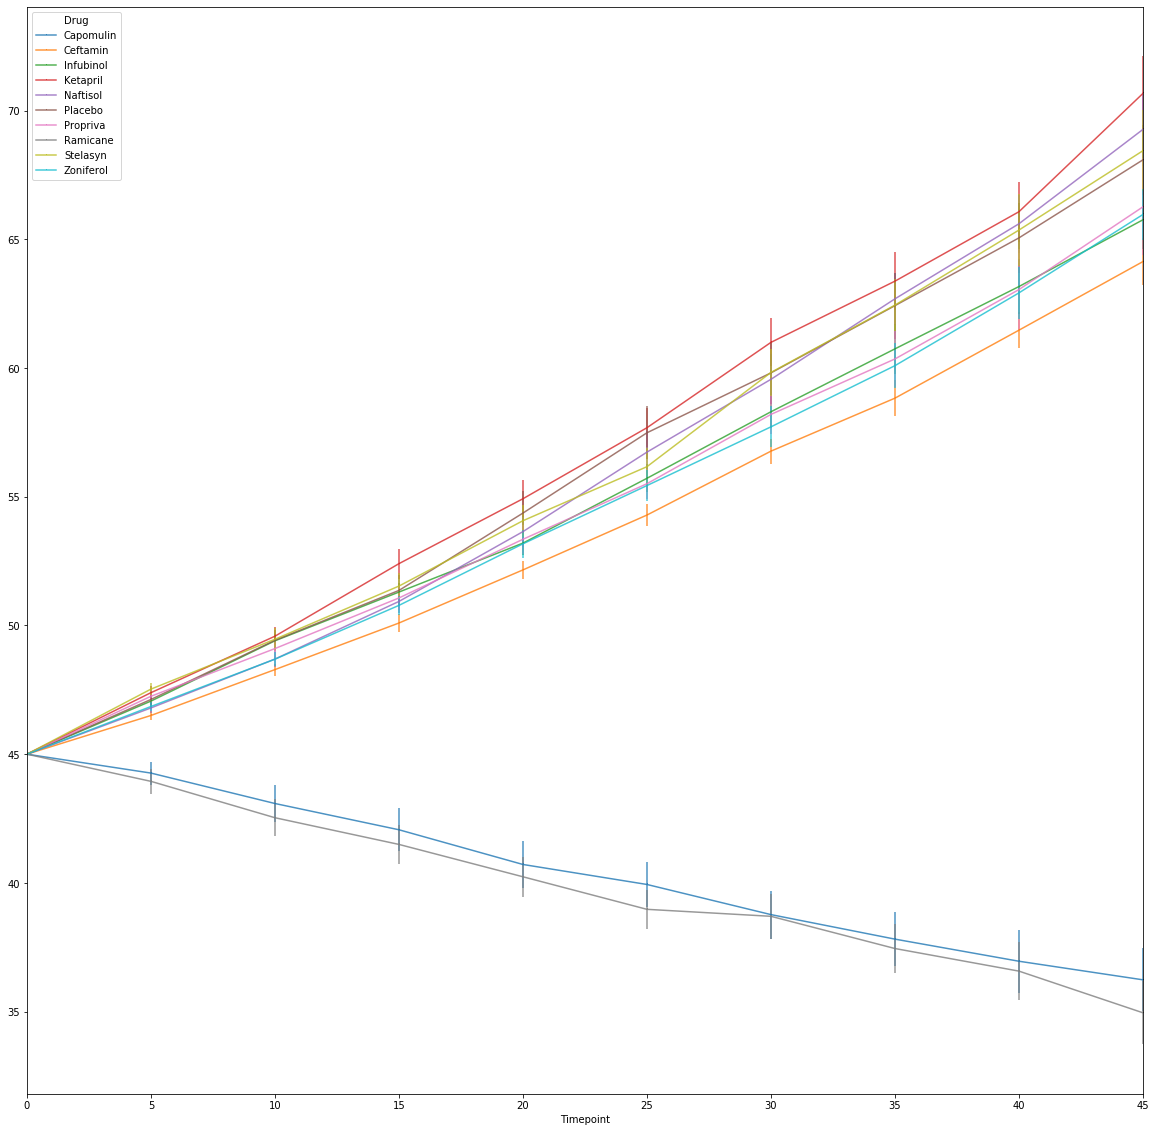

In [5]:
# Generate the Plot (with Error Bars)
plot1 = reform_mean_tumor_size.plot(figsize=(20,20), marker=',', alpha=.8, yerr=reform_std_error_tumor_size, label="Tumor Size (mm3)")
plt.show()
# Save the Figure
#plt.savefig('Tumor Response to Treatment.png')



## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_drug_time_met_site = df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
met_site_count_by_drug_and_time = pd.DataFrame({ "Metastatic Sites" : grouped_drug_time_met_site}).reset_index()

# Preview DataFrame
met_site_count_by_drug_and_time.head(100)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_err = df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
met_site_err_df = pd.DataFrame({ "Metastatic Sites" : met_site_err}).reset_index()

# Preview DataFrame
met_site_err_df.head(100)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [8]:
# Minor Data Munging to Re-Format the Data Frames
reform_met_tumor_count = met_site_count_by_drug_and_time.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
reform_met_error = met_site_err_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
reform_met_tumor_count.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


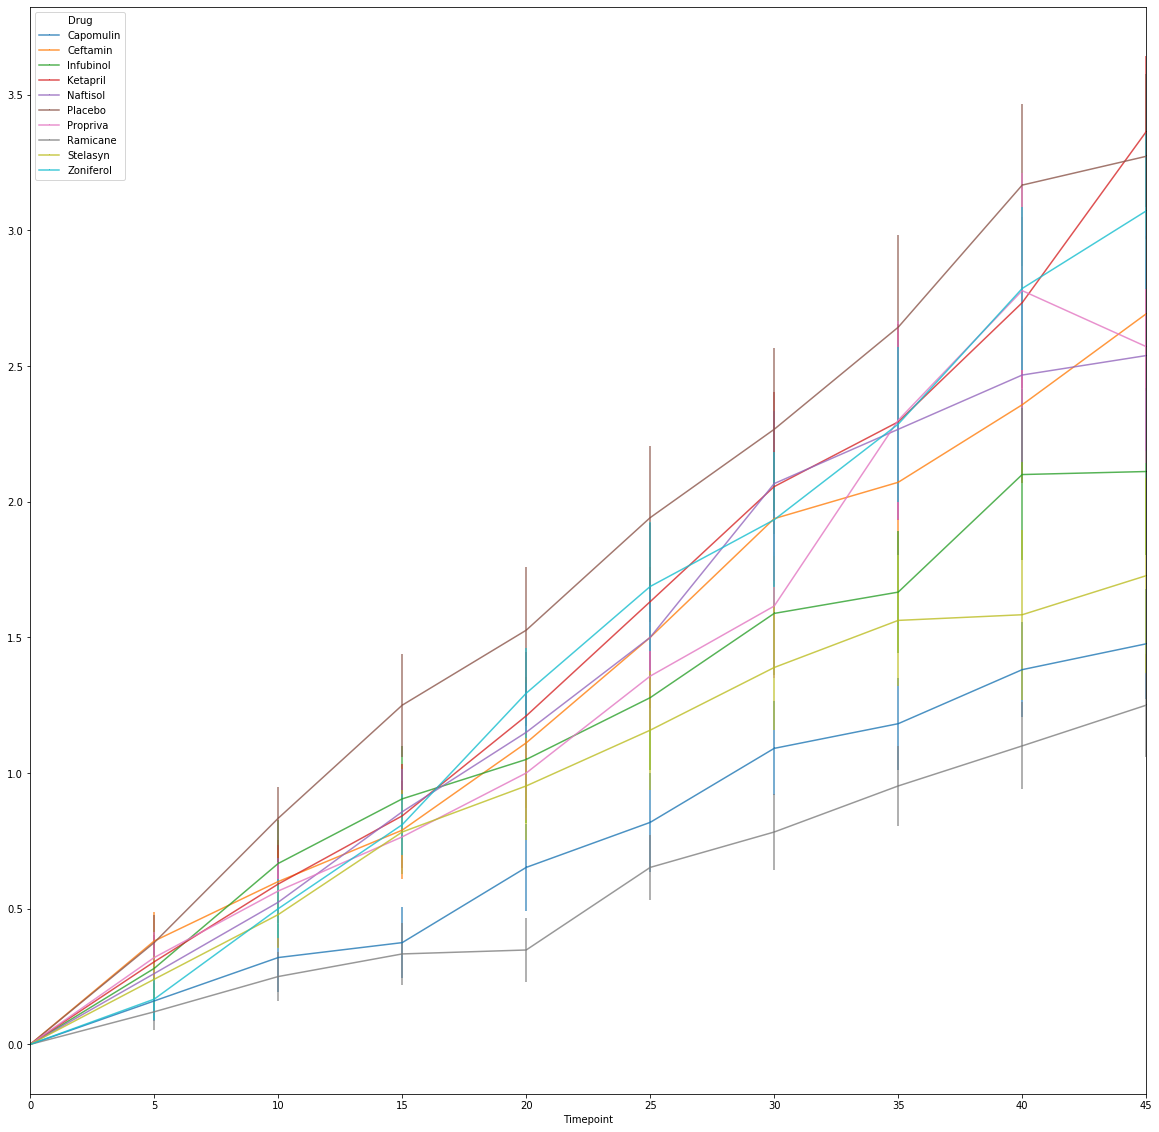

In [9]:
# Generate the Plot (with Error Bars)
plot2 = reform_met_tumor_count.plot(figsize=(20,20), marker=',', alpha=.8, yerr=reform_met_error, label="Metastatic Sites")

# Save the Figure
#plt.savefig('Metastatic Response to Treatment.png')
# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = df.groupby(["Drug","Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
mice_count_df = pd.DataFrame({ "Live Mice Remaining" : mice_count}).reset_index()

# Preview DataFrame
mice_count_df.head(100)

,Drug,Timepoint,Live Mice Remaining
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [11]:
# Minor Data Munging to Re-Format the Data Frames
reform_mice_count = mice_count_df.pivot(index="Timepoint", columns="Drug", values="Live Mice Remaining")

# Preview the Data Frame
reform_mice_count.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


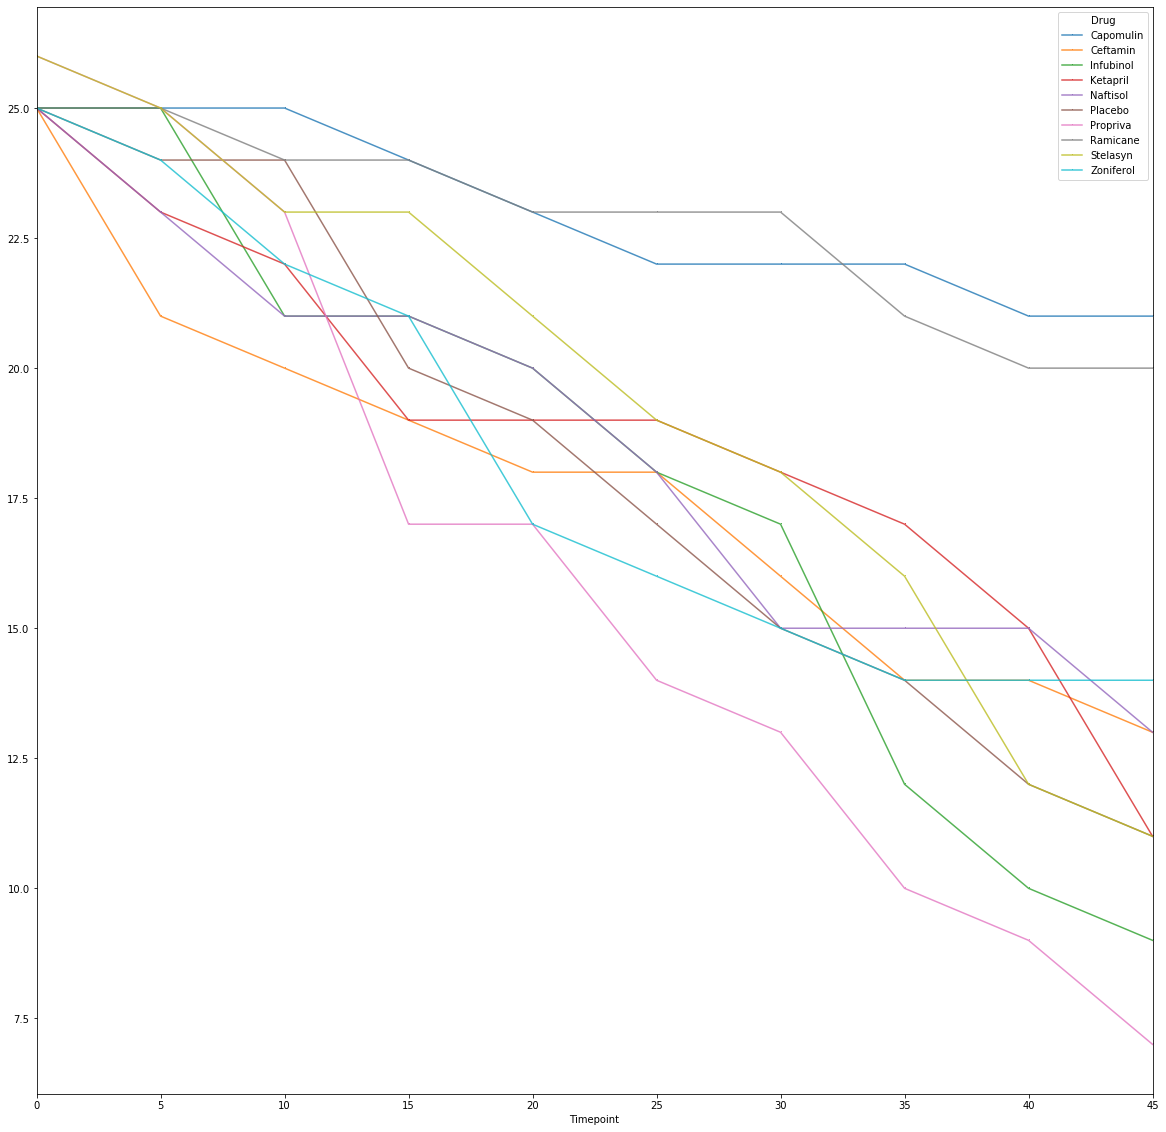

In [12]:
# Generate the Plot (Accounting for percentages)
plot3 = reform_mice_count.plot(figsize=(20,20), marker=',', alpha=.8, label="Mice Count")

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
tumor_percent = mean_tumor_by_drug_and_time.loc[mean_tumor_by_drug_and_time["Timepoint"] == 45, :]

tumor_percent["Percent Change"] = (tumor_percent["Mean Tumor Volume (mm3)"] - 45) / 45

# Display the data to confirm
tumor_percent.head(25)

,Drug,Timepoint,Mean Tumor Volume (mm3),Percent Change
9,Capomulin,45,36.236114,-0.194753
19,Ceftamin,45,64.132421,0.425165
29,Infubinol,45,65.755562,0.461235
39,Ketapril,45,70.662958,0.570288
49,Naftisol,45,69.265506,0.539233
59,Placebo,45,68.084082,0.512980
69,Propriva,45,66.258529,0.472412
79,Ramicane,45,34.955595,-0.223209
89,Stelasyn,45,68.438310,0.520851
99,Zoniferol,45,65.960888,0.465798


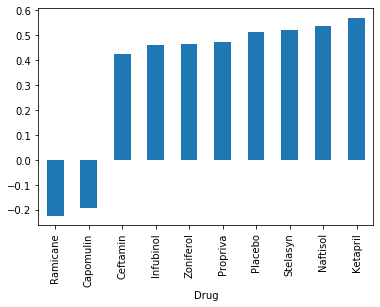

In [14]:
# Store all Relevant Percent Changes into a Tuple
#There's no reason that I would need to do this

# Splice the data between passing and failing drugs
tumor_percent = tumor_percent.sort_values("Percent Change", ascending=True).set_index("Drug")


# Orient widths. Add labels, tick marks, etc.
tumor_percent["Percent Change"].plot(kind="bar", label="Change in tumor size")

# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure


In [15]:
#Observations
print("Observation 1: only ramicane and capomulin seem to have any positive impact on the mice's health")
print("Observation 2: despite ramicane reducing tumor size more dramatically than capomulin, capomulin was the least likely to kill the mice.")
print("Observation 3: there isn't a perfect direct correlation between tumor size and survivability. This means that the data implies a sweet spot tumor volume that's slightly more beneficial to survivability than no tumor at all. Logically, that's probably not actually how this works")

Observation 1: only ramicane and capomulin seem to have any positive impact on the mice's health
Observation 2: despite ramicane reducing tumor size more dramatically than capomulin, capomulin was the least likely to kill the mice.
Observation 3: there isn't a perfect direct correlation between tumor size and survivability. This means that the data implies a sweet spot tumor volume that's slightly more beneficial to survivability than no tumor at all. Logically, that's probably not actually how this works
